# Interpretabilitat

## Carreguem dades

In [1]:
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")


df_train = pd.read_csv('./datasets/data_train_class7.csv')
df_test = pd.read_csv('./datasets/data_test_class7.csv')

x_train = df_train.drop(columns=['is_recent'])
y_train = df_train['is_recent']

x_test = df_test.drop(columns=['is_recent'])
y_test = df_test['is_recent']

clss = ['Pre-2000', 'Post-2000']

data_columns = x_train.columns
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))
x_train.columns = x_test.columns = data_columns

x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
BPM,1395.0,0.456174,0.179555,0.0,0.318471,0.452229,0.557325,1.0
Energy,1395.0,0.583587,0.229908,0.0,0.401042,0.604167,0.770833,1.0
Danceability,1395.0,0.500500,0.179877,0.0,0.383721,0.500000,0.627907,1.0
Loudness,1395.0,0.723097,0.145117,0.0,0.640000,0.760000,0.840000,1.0
Liveness,1395.0,0.175110,0.169782,0.0,0.072165,0.103093,0.216495,1.0
Valence,1395.0,0.480615,0.258486,0.0,0.270833,0.458333,0.677083,1.0
Length,1395.0,0.131427,0.070653,0.0,0.093407,0.118524,0.152276,1.0
Acousticness,1395.0,0.298786,0.296839,0.0,0.030612,0.183673,0.520408,1.0
Speechiness,1395.0,0.057672,0.082810,0.0,0.018868,0.037736,0.056604,1.0
Popularity,1395.0,0.542193,0.162211,0.0,0.426966,0.561798,0.674157,1.0


## Carreguem models

In [3]:
import pickle


lda = pickle.load(open('./models/lda', 'rb'))
votcls = pickle.load(open('./models/voting_qsvm+mlp', 'rb'))

## Busquem valors atípics

In [36]:
id_max_length = df_test['Length'].idxmax()
id_min_loud = df_test['Loudness'].idxmin()
id_max_loud = df_test['Loudness'].idxmax()
indices = df_test[df_test['Loudness'] == -10]
indices.head()

,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,is_recent,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6
16,152,52,45,-10,10,25,312,32,4,77,0,0,1,0,0,0,0,0
23,93,51,62,-10,26,69,246,54,3,65,0,0,0,0,0,0,1,0
26,100,38,61,-10,28,52,234,84,44,83,1,0,0,0,0,0,1,0
47,97,14,32,-10,18,8,414,93,3,73,0,1,0,0,0,0,0,0
48,125,54,68,-10,6,96,357,22,3,69,0,0,1,0,0,0,0,0


Agafarem també dues cançons amb mateixa _loudness_ però que siguin de diferent classe, per exemple el 23 i el 26.

In [14]:
id_same_loudness_0 = 23
id_same_loudness_1 = 26

## Classificació
Comencem pel max length

In [37]:
y_pred_lda = lda.predict([x_test.iloc[id_max_length]])
y_pred_vot = votcls.predict([x_test.iloc[id_max_length]])

print(f'Resultat real: {y_test.iloc[id_max_length]}')
print(f'Resultat LDA: {y_pred_lda[0]}')
print(f'Resultat Voting Classifier: {y_pred_vot[0]}')

Resultat real: 0
Resultat LDA: 0
Resultat Voting Classifier: 0


In [22]:
y_pred_lda = lda.predict([x_test.iloc[id_min_loud]])
y_pred_vot = votcls.predict([x_test.iloc[id_min_loud]])

print(f'Resultat real: {y_test.iloc[id_min_loud]}')
print(f'Resultat LDA: {y_pred_lda[0]}')
print(f'Resultat Voting Classifier: {y_pred_vot[0]}')

Resultat real: 0
Resultat LDA: 0
Resultat Voting Classifier: 0


In [23]:
y_pred_lda = lda.predict([x_test.iloc[id_max_loud]])
y_pred_vot = votcls.predict([x_test.iloc[id_max_loud]])

print(f'Resultat real: {y_test.iloc[id_max_loud]}')
print(f'Resultat LDA: {y_pred_lda[0]}')
print(f'Resultat Voting Classifier: {y_pred_vot[0]}')

Resultat real: 1
Resultat LDA: 1
Resultat Voting Classifier: 1


In [24]:
y_pred_lda = lda.predict([x_test.iloc[id_same_loudness_0]])
y_pred_vot = votcls.predict([x_test.iloc[id_same_loudness_0]])

print(f'Resultat real: {y_test.iloc[id_same_loudness_0]}')
print(f'Resultat LDA: {y_pred_lda[0]}')
print(f'Resultat Voting Classifier: {y_pred_vot[0]}')

Resultat real: 0
Resultat LDA: 0
Resultat Voting Classifier: 0


In [25]:
y_pred_lda = lda.predict([x_test.iloc[id_same_loudness_1]])
y_pred_vot = votcls.predict([x_test.iloc[id_same_loudness_1]])

print(f'Resultat real: {y_test.iloc[id_same_loudness_1]}')
print(f'Resultat LDA: {y_pred_lda[0]}')
print(f'Resultat Voting Classifier: {y_pred_vot[0]}')

Resultat real: 1
Resultat LDA: 1
Resultat Voting Classifier: 1


Comprovem elements on divergeixen.

In [30]:
import numpy as np


y_pred_lda = lda.predict(x_test)
y_pred_vot = votcls.predict(x_test)

divergence_indices = np.where(y_pred_lda != y_pred_vot)
divergence_indices[0]

array([  4,   9,  24,  39,  44,  47,  53,  62,  72,  88, 126, 137, 149,
       166, 167, 174, 179, 184, 185, 190, 197, 209, 217, 223, 227, 242,
       253, 255, 262, 266, 267, 273, 293, 310, 318, 322, 329, 333, 347,
       350, 353, 354, 360, 362, 381, 384, 391, 395, 398, 414, 431, 440,
       445, 447, 464, 471, 500, 512, 533, 563, 568, 575, 581, 596])

Agafarem per exemple l'índex 4.

In [49]:
id_diverge = 4

y_pred_lda = lda.predict([x_test.iloc[id_diverge]])
y_pred_vot = votcls.predict([x_test.iloc[id_diverge]])

print(f'Resultat real: {y_test.iloc[id_diverge]}')
print(f'Resultat LDA: {y_pred_lda[0]}')
print(f'Resultat Voting Classifier: {y_pred_vot[0]}')

Resultat real: 0
Resultat LDA: 1
Resultat Voting Classifier: 0


Veiem que l'LDA s'equivoca i el Voting aconsegueix el bon resultat. A veure el perquè.

[ 0.  -0.2  0.   0.  -0.2 -0.2 -0.2 -0.2  0.  -0.2  0.   0.   0.   0.
  0.   0.   0. ]


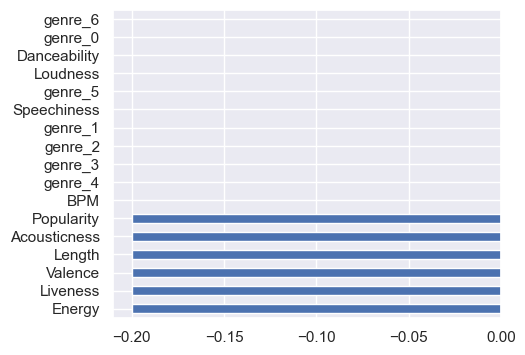

In [58]:
from sklearn.inspection import permutation_importance
from numpy.random import choice
import seaborn as sns
sns.set()


# c = choice(x_test.shape[0], size=500, replace=False)
# pi = permutation_importance(lda, x_test.iloc[c], y_test.to_numpy()[c], n_jobs=-1, random_state=0)
# var_imp_lda = pd.DataFrame({'importance': pi.importances_mean}, index=x_test.columns)
# var_imp_lda.sort_values(by='importance').plot.barh(figsize=(5, 4), legend=False);
# c

c = np.array([id_diverge])
pi = permutation_importance(lda, x_test.iloc[c], y_test.to_numpy()[c], n_jobs=-1, random_state=0)
var_imp_lda = pd.DataFrame({'importance': pi.importances_mean}, index=x_test.columns)
var_imp_lda.sort_values(by='importance').plot.barh(figsize=(5, 4), legend=False);
c